# Passive-Aggressive Classifier

We are going to implement a Passive-Aggressive classifier on our dataset.

In [1]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.
import numpy as np
import pandas as pd

df = pd.read_csv('news/news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()

,news,label
0,smell hillary fear daniel greenfield shillman ...,0
1,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy us secretary s...,1
3,bernie supporter twitter erupt anger dnc tried...,0
4,battle new york primary matter primary day new...,1


In [2]:
# Vectorization
df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix

<6335x80967 sparse matrix of type '<class 'numpy.float64'>'
	with 1762247 stored elements in Compressed Sparse Row format>

In [3]:
label_column = df.loc[:,'label']
labels = label_column.values
print(labels)

[0 0 1 ... 0 1 1]


In [4]:
#Downloading the Passive-Aggressive classifier from sikit learn
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

To implement the Passive-aggressive classifier we need to split our dataset into training and test data.

In [5]:
x = tf_idf_matrix
y = df_output.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Defining our model with a regularisation parameter
model = PassiveAggressiveClassifier()

We can fit our model to our training data.

In [6]:
model.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [7]:
#Making Predictions
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

# Measuring model performance

Now we will measure our Passive-Aggressive model's performance with it fit to our training data.

In [8]:
model.fit(x_train, y_train)
model.score(x_test, y_test)
%time model.fit(x_train, y_train)

Wall time: 59.9 ms


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [9]:
print("accuracy: %0.3f" % (accuracy_score(y_test, y_pred)))

accuracy: 0.937


So this passive-aggressive model has an accuracy of 93.7% which is very good.

We will now see how this model performs with a different train-test split ratio of 75:25.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [11]:
y_predict = model.predict(x_test)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9330808080808081

In [12]:
print("accuracy: %0.3f" % (accuracy_score(y_test, y_predict)))

accuracy: 0.931


Hence the accuracy of this model is 93.1%, which is surprisingly slightly less accurate than a train-test split of 70:30.

In [13]:
test_sizes = np.arange(0.01,0.5,0.01)
accuracys = []
for i in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=42)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    accuracys.append(accuracy)
    
accuracys

[0.90625,
 0.952755905511811,
 0.9528795811518325,
 0.9448818897637795,
 0.9369085173501577,
 0.931758530183727,
 0.9301801801801802,
 0.9349112426035503,
 0.9281961471103327,
 0.9305993690851735,
 0.9325681492109039,
 0.9290407358738502,
 0.9344660194174758,
 0.939120631341601,
 0.9411146161934806,
 0.9398422090729783,
 0.9396471680594243,
 0.9342681858019282,
 0.9343853820598007,
 0.9329123914759274,
 0.9368895567242674,
 0.936154949784792,
 0.9355281207133059,
 0.9335963182117029,
 0.9343434343434344,
 0.9314320388349514,
 0.9333722969023963,
 0.9323562570462233,
 0.9330794341675734,
 0.9337190952130457,
 0.9322810590631364,
 0.9363905325443787,
 0.9354375896700143,
 0.9363974001857011,
 0.9359783588818755,
 0.9342393686979396,
 0.9325938566552902,
 0.9327242524916943,
 0.9279643868878996,
 0.9293606945540647,
 0.9245573518090839,
 0.9240886884629839,
 0.9255045871559633,
 0.922883787661406,
 0.9245878639074009,
 0.9241852487135506,
 0.9267965077233042,
 0.9260111805327195,
 0.92657

Text(0, 0.5, 'Passive-Aggressive Classifier Accuracy')

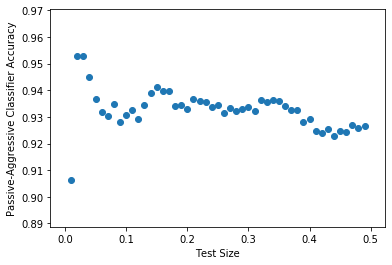

In [33]:
import matplotlib.pyplot as plt
plt.scatter(test_sizes, accuracys)
plt.xlabel('Test Size')
plt.ylabel('Passive-Aggressive Classifier Accuracy')

In [15]:
test_sizes[np.argmax(accuracys)]

0.03

Hence our Passive-Aggressive classifier model has greatest accuracy with a very small test size.

# Confusion Matrix

To visualise the performance of our model we can use a confusion matrix. This compares the predicted class with the actual class.

In [16]:
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
confusion = metrics.confusion_matrix(y_test, model.predict(x_test))
classification = metrics.classification_report(y_test,model.predict(x_test))

In [17]:
print('Success rate of the model on fake news articles: ' + str(confusion[0][0]/(confusion[0][0] + confusion[0][1])))
print('Success rate of the model on real news articles: ' + str(confusion[1][1]/(confusion[1][0] + confusion[1][1])))

Success rate of the model on fake news articles: 0.9369834710743802
Success rate of the model on real news articles: 0.9217577706323687


Hence the passive-agresive model is more accurate at classifying fake news articles compared to real news articles.

We can calculate the relevant metrics other than accuracy, which are precision, recall and the harmonic average of precision and recall which is the f1-score. This gives us a better evaluation of the performance of our Perceptron model.

In [18]:
print(confusion)
print(classification)

[[907  61]
 [ 73 860]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       968
           1       0.93      0.92      0.93       933

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



Hence the precision and recall values vary slightly in real and fake, but the F1 score is consistent with real and fake articles, with a value of 0.93.

# Testing on unseen data

Now that we have built a Passive-Aggressive classifier model, we want to see how this model performs on unseen data. We will now preprocess two articles, one real and one fake, into vector form so we can test our model on them.

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()
    

def article_preprocessor (article):
    filtered_article = ''
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    return filtered_article

In [20]:
def passive_aggressive_classifier (list_of_articles):
    
    #To preprocess these articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    new_input = df_input.append(pd.Series(articles_pp))
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    
    #Performing the Passive-Aggressive classifier on the dataset
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    model = PassiveAggressiveClassifier()
    model.fit(x_train, y_train)
    accuracy = model.score(x_test,y_test)
    print('The Passive-Aggressive classifier model accuracy: ' +str(accuracy))
    
    prediction = model.predict(new_data_matrix)
    
    return prediction
    

In [21]:
# The top news story on the BBC
bbc_news_article = '''The furlough scheme will be extended until the end of September by the chancellor in the Budget later.
Rishi Sunak said the scheme - which pays 80% of employees' wages for the hours they cannot work in the pandemic - would help millions through "the challenging months ahead".
Some 600,000 more self-employed people will also be eligible for government help as access to grants is widened.
But Labour said the support schemes should have been extended "months ago".
Mr Sunak will outline a three-point plan to support people through the coming months, rebuild the economy and "fix" the public finances in the wake of the pandemic when he delivers his statement to the Commons at about 12:30 GMT.
But he has warned of tough economic times ahead and there are reports that he plans to raise some taxes.'''

# Here's a fake news article from the New York Mag
fake_article = '''Twelve days out from judgment day in an election in which he continues to trail badly, President Trump continues to hammer home an issue that will surely resonate with that small slice of still-undecided voters: his supposedly unfair treatment at the hands of CBS’s Lesley Stahl. After two days of promising to release unedited footage of an as-yet-unaired 60 Minutes interview, during which he walked out prematurely because he was upset with Stahl’s line of questioning, the president finally followed through on Thursday. Throughout the interview, Stahl presses Trump on issues from health care (the president says he hopes the Supreme Court strikes down Obamacare, a politically toxic position) to his derogatory comments about Anthony Fauci (Trump claims he was misinterpreted) to his false claims that the Obama campaign spied on him. The tone is of an adversarial back-and-forth, well within normal journalistic bounds. Nevertheless, Trump continuously claims that Joe Biden hasn’t been given similar treatment by CBS and cuts the proceedings short.'''

In [22]:
articles = [bbc_news_article,fake_article]
passive_aggressive_classifier(articles)

The Passive-Aggressive classifier model accuracy: 0.9324494949494949


array([1, 0], dtype=int64)

Hence our Passive-Aggressive classifier has correctly classified both the real and the fake news article!

# Hyperparameter Optimisation

We will now try and improve our model's performance using grid search. The Passive-Aggressive classifier does not have a learning rate, so we can see how changing the regularisation parameter would affect the performance of our model.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [24]:
x = tf_idf_matrix
y = df_output.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
model = PassiveAggressiveClassifier()
#C is the regularisation parameter of our Passive-Aggressive model
param_grid = {"C": [0.001, 0.002, 0.01, 0.02, 0.1, 0.2, 1.0, 2.0],}

In [26]:
model.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

In [28]:
results = grid.fit(x_train, y_train)
print('Mean Accuracy: %.3f' % results.best_score_)

Mean Accuracy: 0.937


In [29]:
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

In [30]:
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.906 with: {'C': 0.001}
>0.916 with: {'C': 0.002}
>0.935 with: {'C': 0.01}
>0.937 with: {'C': 0.02}
>0.937 with: {'C': 0.1}
>0.936 with: {'C': 0.2}
>0.936 with: {'C': 1.0}
>0.936 with: {'C': 2.0}


Hence we can see that the accuracy of our Passive-Aggressive classifier model varies when we change the regularisation parameter, and our model performs best with a regularisation parameter of 0.02 or 0.1 with an accuracy of 93.7%.

Now to test whether varying the proportion of training data set aside as validation set will affect the performance of our model.

In [31]:
param_grid = {"validation_fraction": [0.001, 0.002, 0.01, 0.02, 0.1, 0.2],}
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
results = grid.fit(x_train, y_train)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.937 with: {'validation_fraction': 0.001}
>0.937 with: {'validation_fraction': 0.002}
>0.936 with: {'validation_fraction': 0.01}
>0.937 with: {'validation_fraction': 0.02}
>0.936 with: {'validation_fraction': 0.1}
>0.936 with: {'validation_fraction': 0.2}


Hence the accuracy doesnt change too much with different validation fractions, but has greatest accuracy of 93.7% with a very small validation fraction, or with a validation fraction of 0.02.

We can also test whether the random state of our model will affect the accuracy.

In [32]:
param_grid = {"random_state": [0, 1, 5, 25, 42, 50],}
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
results = grid.fit(x_train, y_train)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.936 with: {'random_state': 0}
>0.935 with: {'random_state': 1}
>0.937 with: {'random_state': 5}
>0.937 with: {'random_state': 25}
>0.937 with: {'random_state': 42}
>0.936 with: {'random_state': 50}


Hence our model has a greater accuracy with random state 42 over the default random state 0.